<a href="https://colab.research.google.com/github/bryanMontoya/mlTalleres/blob/main/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Logística.**

* Jojhan Stiven Puerta Castaño.
* Brayan Montoya Osorio.



La regresión logística es un método de machine learning usado para realizar clasificación biclase el cual es basado en modelos. Este método requiere que los datos sean linealmente separables para su buen funcionamiento y la pertenencia a una clase u otra se representa mediante probabilidades las cuales se obtienen gracias a la función sigmoide que convierte distancias a probabilidades.

In [ ]:
#Importación de librerías.
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

**Punto 1: Algoritmo de gradiente descendente.**

El algoritmo de gradiente descendente da la posibilidad de encontrar los parámetros óptimos que se ajustan de mejor manera a los datos, su ecuación es mostrada a continuación:
$$\theta_{j} = \theta_{j} - \eta \sum_{i=1}^{m}(\psi^{i} - \phi(z)) x_{j}$$

Donde $\theta$ son los parámetros, $\eta$ es la velocidad de aprendizaje, $\psi$ son las etiquetas, $\phi(z)$ es la predicción y $x$ son las características.

A continuación un ejemplo de programación del algoritmo de gradiente descendente:




In [ ]:
def derParcial(proba, labels, feature):
  d = 0    
  labels = np.array([labels])
  feature = np.array([feature])
  proba = np.array([proba])
  for i in range(len(labels)):    
    d = d + (labels[i] - proba[i])*feature[i]    
  return d

In [ ]:
def graDesc(X_train, y_train, n, itera):
  m, Tcarac = np.shape(X_train)
  t = [random.uniform(-10, 10)]
  for _ in range(Tcarac):
    t.append(random.uniform(-10, 10))   # Se generan los valores aleatorios iniciales para los parámetros

  for _ in range(itera):
    for i in range(Tcarac):
      proba = evaluarModelo(X_train, t)
      X_train = np.array([X_train[:, i]])
      X_train = X_train.transpose()
      der = derParcial(proba, y_train, X_train)
      t[i] = t[i] - n*der  
  return t

**Punto 2: Evaluar modelo.**

El modelo de regresión logística se evalúa a través de función sigmoide mostrada a continuación:

$$h(\theta) = \frac{1}{1 + e^{-\theta^{T}x}}$$

A continuación un ejemplo de programación para esta función:

In [ ]:
def evaluarModelo(featuresMatrix, parametros):
  probaVector = []
  for features in featuresMatrix:            
    #Insertar un uno en la posicion cero, para poder hacer el producto punto.
    features = np.append(10, features)       
    try:
      pp = np.dot(parametros, features)    
      probaVector.append(1/(1 + math.exp((-1)*pp)))                        
    except:
      probaVector.append(1)
  return probaVector

**Punto 3: Función de coste.**

La función de coste para la regresión logística trata de determinar el error entre el valor estimado y el valor real en el modelo. Esta función está dada por la siguiente ecuación:

$$ J(\theta(z), y, \theta) = - [\sum_{i=1}^{m}(y^{(i)}\log{\phi(z)} + (1 - y^{i})\log{(1- \phi(z))}] $$

A continuación un ejemplo de programación para la función de coste:

In [ ]:
def funCoste(features, labels, proba):
  J = 0
  for i in range(len(proba)):
    J = J + labels[i]*np.log(proba[i]) + (1 - labels[i])*np.log(1 - proba[i])
  return -J

**Punto 4: AUC y curva ROC**

La curva ROC y el AUC son métricas que dicen que tan bueno es un modelo haciendo uso de la TPR(Tasa de verdadera aceptación) y la FPR(Tasa de falsa aceptación), las cuales se calculan a través de la sensibilidad y especificidad.

A continuación se presenta un ejemplo de programación para el cálculo de la curva ROC y el área bajo la curva AUC.

In [ ]:
#Dibujar curva ROC y retornar valor del AUC
def ROC(labels, proba):        
    #Se ordenan los scores de mayor a menor.
    labelsOrdenado, scores, sensibilidad, especificidad, FPR = [], [], [], [], []    
    probaOrdenado = np.flipud(np.argsort(proba))    
    for i in probaOrdenado:
        labelsOrdenado.append(labels[i])
        scores.append(proba[i])        
    
    #Se llenan las listas de sensibilidad y especificidad.         
    denomSensi = labels.count(1)
    denomEspec = labels.count(0)
    unos, ceros = 0, denomEspec     
    for i in range(len(labelsOrdenado)):
        if (denomSensi == 0):
          denomSensi = 1
        if (denomEspec == 0):
          denomEspec = 1
        sensibilidad.append(unos/denomSensi)    
        especificidad.append(ceros/denomEspec)                    
        if (labelsOrdenado[i] == 1):
            unos+=1   
        elif (labelsOrdenado[i] == 0):
            ceros-=1                             

    especificidad[len(especificidad) - 1] = 0
    #Calcular TPR
    for i in especificidad:
        FPR.append(1 - i)
    TPR = sensibilidad    
    
    plt.scatter(FPR, TPR)
    plt.plot(FPR, TPR)
    plt.title("Curva ROC")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
        
    return FPR, TPR

FPR:  [0.0, 0.0, 0.0, 0.0, 0.19999999999999996, 0.19999999999999996, 0.4, 0.4, 0.6, 1]
TPR:  [0.0, 0.2, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0, 1.0]


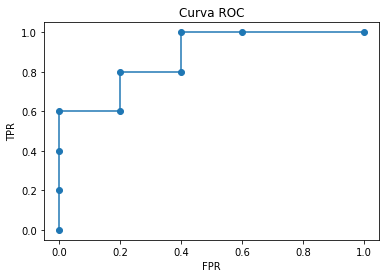

In [ ]:
labels = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
proba = [0.98, 0.53, 0.53, 0.48, 0.47, 0.73, 0.61, 0.34, 0.8, 0.18]

FPR, TPR = ROC(labels, proba)
print("FPR: ", FPR)
print("TPR: ", TPR)

**Punto 5:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Descripción: Función encargada de dividir entre train y test además de aplicar estandarización a la matriz de características.
def estandarizar(paramEstandarizacion, features, labels, test_size):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = test_size, random_state = 4)    
    #Estandarización Min-Max.
    if (paramEstandarizacion == 1):
        for feature in range(X_train.shape[1]):
            xx = X_train[: , feature]
            x_min = xx.min()
            x_max = xx.max()        
            for i in range(len(X_train)):
                X_train[i , feature] = (X_train[i , feature] - x_min)/(x_max - x_min)  
            for i in range(len(X_test)):
                X_test[i , feature] = (X_test[i , feature] - x_min)/(x_max - x_min)    
    #Estandarización Z-score.    
    elif (paramEstandarizacion == 2):
        for feature in range(X_train.shape[1]):
            xx = X_train[: , feature]            
            mean = np.mean(xx)
            std = np.std(xx)
            for i in range(len(X_train)):
                X_train[i , feature] = (X_train[i , feature] - mean)/std  
            for i in range(len(X_test)):
                X_test[i , feature] = (X_test[i , feature] - mean)/std    
    return X_train, X_test, y_train, y_test

In [ ]:
#Descipción: Función encargada de graficar la matriz de confusión.
def Matriz_plt(conf_Matrix, numClases):
  axis=np.arange(numClases+1)
  sb.heatmap(conf_Matrix, center=0, annot=True, fmt=".2f",
             cmap="YlGnBu", linewidths=.5, cbar=True, 
             xticklabels=axis, yticklabels=axis);               
  plt.title("Confusion Matrix")
  plt.xlabel('Predicciones')
  plt.ylabel('Real')

In [ ]:
#Descripción: Función encargada de calcular las métricas de desempeño.
def metrics(yreal, ypred, plotMatriz):
  xx = []
  xx.append(int(np.max(yreal)))
  xx.append(int(np.max(ypred)))
  numClases = max(xx)  
  acc=0

  conf_Matrix = np.zeros((numClases+1,numClases+1))
  rec=np.zeros(numClases+1)
  pre=np.zeros(numClases+1)
  f1=np.zeros(numClases+1)
  for i in range(len(yreal)):
    y = int (ypred[i])
    x = int (yreal[i])
    aux = conf_Matrix[x,y]
    conf_Matrix[x,y] = aux + 1
  
  if (plotMatriz):
    Matriz_plt(conf_Matrix, numClases)
  
  for i in range(len(conf_Matrix)):
    rec[i] = conf_Matrix[i,i]/np.sum(conf_Matrix[i,:])    
  
  for i in range(len(conf_Matrix)):
    pre[i] = conf_Matrix[i][i]/sum(conf_Matrix[:,i])      
  
  acc = np.diagonal(conf_Matrix).sum()/np.sum(conf_Matrix)  

  for i in range(len(rec)):
    f1[i]=2*(pre[i]*rec[i])/(pre[i]+rec[i])    
  
  return acc, pre, rec, f1

In [ ]:
def regresionLogistica(features, labels, paramEstandarizacion):      
  #Estandarizar la matriz de características.
  X_train, X_test, y_train, y_test = estandarizar(paramEstandarizacion, features, labels, 0.2)    
  #llamado a función de gradiente descendente.      
  parametros = graDesc(X_train, y_train, 0.01, 1000)
  #Evaluar Modelo    
  vectorProba = evaluarModelo(X_test, parametros)  
  ROC(y_test, vectorProba)